In [6]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import os
from matplotlib import pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix  
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.externals.six import StringIO
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import tensorflow as tf
%matplotlib inline

In [84]:
train = pd.read_csv("white_wine_stratified_train.csv")

In [85]:
test = pd.read_csv("white_wine_stratified_test.csv")

In [86]:
train.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0           10.7              0.22         0.56             8.2      0.044   
1            6.8              0.15         0.41            12.9      0.044   
2            7.0              0.16         0.25            14.3      0.044   
3            6.7              0.24         0.29            14.9      0.053   
4            7.4              0.28         0.25            11.9      0.053   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 37.0                 181.0  0.99800  2.87       0.68   
1                 79.5                 183.0  0.99742  3.24       0.78   
2                 27.0                 149.0  0.99800  2.91       0.46   
3                 55.0                 136.0  0.99839  3.03       0.52   
4                 25.0                 148.0  0.99760  3.10       0.62   

   alcohol  quality  
0      9.5        6  
1     10.2        6  
2      9.2        6  
3      9.0        5  
4      9.2        5

In [87]:
test.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            5.6              0.19         0.26            1.40      0.030   
1            6.8              0.30         0.35            2.80      0.038   
2            6.9              0.40         0.30           10.60      0.033   
3            7.5              0.42         0.14           10.70      0.046   
4            6.9              0.38         0.29           13.65      0.048   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 12.0                  76.0  0.99050  3.25       0.37   
1                 10.0                 164.0  0.99120  3.09       0.53   
2                 24.0                  87.0  0.99265  3.15       0.45   
3                 18.0                  95.0  0.99590  3.22       0.33   
4                 52.0                 189.0  0.99784  3.00       0.60   

   alcohol  quality  
0     10.9        7  
1     12.0        6  
2     12.8        6  
3     10.7        5  
4      9.5        6

In [88]:
train["quality3"] = 0              # 이거 왜 넣은 거지..?  새로 생성산건가본데?
test["quality3"] = 0

In [89]:
train.head()
type(train)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0           10.7              0.22         0.56             8.2      0.044   
1            6.8              0.15         0.41            12.9      0.044   
2            7.0              0.16         0.25            14.3      0.044   
3            6.7              0.24         0.29            14.9      0.053   
4            7.4              0.28         0.25            11.9      0.053   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 37.0                 181.0  0.99800  2.87       0.68   
1                 79.5                 183.0  0.99742  3.24       0.78   
2                 27.0                 149.0  0.99800  2.91       0.46   
3                 55.0                 136.0  0.99839  3.03       0.52   
4                 25.0                 148.0  0.99760  3.10       0.62   

   alcohol  quality  quality3  
0      9.5        6         0  
1     10.2        6         0  
2      9.2        6         0  
3      9.0        5         0  
4      9.2        5         0

pandas.core.frame.DataFrame

## 품질 상중하로 나누는 과정

In [90]:
for i in range(3, 6): 
    train["quality3"] = np.where(train.quality == i, 1, train.quality3)
    test["quality3"] = np.where(test.quality == i, 1, test.quality3)
train["quality3"] = np.where(train.quality == 6, 2, train.quality3)
test["quality3"] = np.where(test.quality == 6, 2, test.quality3)
for i in range(7, 10): 
    train["quality3"] = np.where(train.quality == i, 3, train.quality3)
    test["quality3"] = np.where(test.quality == i, 3, test.quality3)

In [113]:
train[["quality", "quality3"]]

quality  quality3
0           6         2
1           6         2
2           6         2
3           5         1
4           5         1
5           5         1
6           6         2
7           6         2
8           6         2
9           5         1
10          7         3
11          6         2
12          5         1
13          5         1
14          6         2
15          6         2
16          6         2
17          6         2
18          7         3
19          5         1
20          6         2
21          4         1
22          5         1
23          7         3
24          6         2
25          4         1
26          7         3
27          6         2
28          6         2
29          6         2
...       ...       ...
3398        6         2
3399        6         2
3400        5         1
3401        7         3
3402        6         2
3403        5         1
3404        4         1
3405        6         2
3406        7         3
3407        7         3
3408        4         1
3409        6         2
3410        6         2
3411        7         3
3412        6         2
3413        5         1
3414        6         2
3415        6         2
3416        6         2
3417        7         3
3418        6         2
3419        5         1
3420        7         3
3421        8         3
3422        5         1
3423        6         2
3424        5         1
3425        6         2
3426        7         3
3427        6         2

[3428 rows x 2 columns]

In [114]:
X_train = train.drop(["quality", "quality3"], axis = 1)  # 품질 cloumn 떨어트림
X_train.head()
y_train = train["quality"]
y_train

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0           10.7              0.22         0.56             8.2      0.044   
1            6.8              0.15         0.41            12.9      0.044   
2            7.0              0.16         0.25            14.3      0.044   
3            6.7              0.24         0.29            14.9      0.053   
4            7.4              0.28         0.25            11.9      0.053   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 37.0                 181.0  0.99800  2.87       0.68   
1                 79.5                 183.0  0.99742  3.24       0.78   
2                 27.0                 149.0  0.99800  2.91       0.46   
3                 55.0                 136.0  0.99839  3.03       0.52   
4                 25.0                 148.0  0.99760  3.10       0.62   

   alcohol  
0      9.5  
1     10.2  
2      9.2  
3      9.0  
4      9.2

0       6
1       6
2       6
3       5
4       5
5       5
6       6
7       6
8       6
9       5
10      7
11      6
12      5
13      5
14      6
15      6
16      6
17      6
18      7
19      5
20      6
21      4
22      5
23      7
24      6
25      4
26      7
27      6
28      6
29      6
       ..
3398    6
3399    6
3400    5
3401    7
3402    6
3403    5
3404    4
3405    6
3406    7
3407    7
3408    4
3409    6
3410    6
3411    7
3412    6
3413    5
3414    6
3415    6
3416    6
3417    7
3418    6
3419    5
3420    7
3421    8
3422    5
3423    6
3424    5
3425    6
3426    7
3427    6
Name: quality, Length: 3428, dtype: int64

In [115]:
y3_train = train["quality3"]
y3_train.head()

0    2
1    2
2    2
3    1
4    1
Name: quality3, dtype: int64

In [116]:
X_test = test.drop(["quality", "quality3"], axis = 1)
y_test = test["quality"]
y3_test = test["quality3"]

In [117]:
X_train.shape
X_train.head()

(3428, 11)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0           10.7              0.22         0.56             8.2      0.044   
1            6.8              0.15         0.41            12.9      0.044   
2            7.0              0.16         0.25            14.3      0.044   
3            6.7              0.24         0.29            14.9      0.053   
4            7.4              0.28         0.25            11.9      0.053   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 37.0                 181.0  0.99800  2.87       0.68   
1                 79.5                 183.0  0.99742  3.24       0.78   
2                 27.0                 149.0  0.99800  2.91       0.46   
3                 55.0                 136.0  0.99839  3.03       0.52   
4                 25.0                 148.0  0.99760  3.10       0.62   

   alcohol  
0      9.5  
1     10.2  
2      9.2  
3      9.0  
4      9.2

In [118]:
y_train.shape
y_train

(3428,)

0       6
1       6
2       6
3       5
4       5
5       5
6       6
7       6
8       6
9       5
10      7
11      6
12      5
13      5
14      6
15      6
16      6
17      6
18      7
19      5
20      6
21      4
22      5
23      7
24      6
25      4
26      7
27      6
28      6
29      6
       ..
3398    6
3399    6
3400    5
3401    7
3402    6
3403    5
3404    4
3405    6
3406    7
3407    7
3408    4
3409    6
3410    6
3411    7
3412    6
3413    5
3414    6
3415    6
3416    6
3417    7
3418    6
3419    5
3420    7
3421    8
3422    5
3423    6
3424    5
3425    6
3426    7
3427    6
Name: quality, Length: 3428, dtype: int64

In [123]:
def print_confusion_matrix(confusion_matrix, class_names, figsize=(6,5), fontsize=14):
    """Prints a confusion matrix, as returned by sklearn.metrics.confusion_matrix, as a heatmap.
    
    Arguments
    ---------
    confusion_matrix: numpy.ndarray
        The numpy.ndarray object returned from a call to sklearn.metrics.confusion_matrix. 
        Similarly constructed ndarrays can also be used.
    class_names: list
        An ordered list of class names, in the order they index the given confusion matrix.
    figsize: tuple
        A 2-long tuple, the first value determining the horizontal size of the ouputted figure,
        the second determining the vertical size. Defaults to (10,7).
    fontsize: int
        Font size for axes labels. Defaults to 14.
        
    Returns
    -------
    matplotlib.figure.Figure
        The resulting confusion matrix figure
    """
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    plt.ylabel('Real Quality')
    plt.xlabel('Predicted Quality')
    return fig

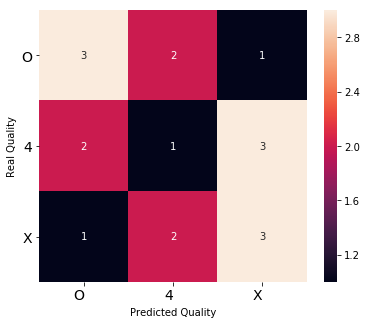

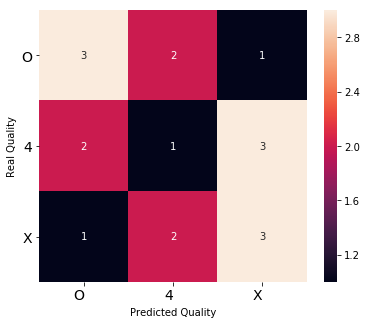

In [13]:
reg = [[3, 2, 1], [2, 1, 3], [1, 2, 3]]
print_confusion_matrix(reg, ["O", "4", "X"])

# Linear

In [98]:
svclassifier = SVC(kernel='linear')  

In [99]:
type(svclassifier)

sklearn.svm.classes.SVC

In [120]:
X_train.head()
y_train.head()
svclassifier.fit(X_train, y_train)  

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0           10.7              0.22         0.56             8.2      0.044   
1            6.8              0.15         0.41            12.9      0.044   
2            7.0              0.16         0.25            14.3      0.044   
3            6.7              0.24         0.29            14.9      0.053   
4            7.4              0.28         0.25            11.9      0.053   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 37.0                 181.0  0.99800  2.87       0.68   
1                 79.5                 183.0  0.99742  3.24       0.78   
2                 27.0                 149.0  0.99800  2.91       0.46   
3                 55.0                 136.0  0.99839  3.03       0.52   
4                 25.0                 148.0  0.99760  3.10       0.62   

   alcohol  
0      9.5  
1     10.2  
2      9.2  
3      9.0  
4      9.2

0    6
1    6
2    6
3    5
4    5
Name: quality, dtype: int64

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [101]:
y_pred = svclassifier.predict(X_test)  

In [124]:
print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred))  

[[  0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0]
 [  6   0   0   0   0   0   0   0   0]
 [ 33  16   0   0   0   0   0   0   0]
 [246 191   0   0   0   0   0   0   0]
 [144 516   0   0   0   0   0   0   0]
 [ 16 248   0   0   0   0   0   0   0]
 [  0  53   0   0   0   0   0   0   0]
 [  0   1   0   0   0   0   0   0   0]]
             precision    recall  f1-score   support

          1       0.00      0.00      0.00         0
          2       0.00      0.00      0.00         0
          3       0.00      0.00      0.00         6
          4       0.00      0.00      0.00        49
          5       0.00      0.00      0.00       437
          6       0.00      0.00      0.00       660
          7       0.00      0.00      0.00       264
          8       0.00      0.00      0.00        53
          9       0.00      0.00      0.00         1

avg / total       0.00      0.00      0.00      1470



C:\Users\renz\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\renz\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


# 여기까지가... 끝인가보다... 이젠 그만하겠소... 빡대가리 ㅠㅠ 8/2

### quality3

In [125]:
svclassifier = SVC(kernel='linear')  
svclassifier.fit(X_train, y3_train)  

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [126]:
y_pred = svclassifier.predict(X_test)  

In [127]:
names
coef_dict

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

{'fixed acidity': 0.24085685564296,
 'volatile acidity': 9.60432459020383,
 'citric acid': 0.43005854362462514,
 'residual sugar': 0.1437077039331598,
 'chlorides': 2.109782575465438,
 'free sulfur dioxide': 0.027791593165602535,
 'total sulfur dioxide': 0.010128645502845757,
 'density': 0.2481903684021063,
 'pH': 0.8633613504293862,
 'sulphates': 3.314386701765102,
 'alcohol': 1.8611261113874207}

In [128]:
coef = svclassifier.coef_
names = X_train.columns
coef_dict = dict()
for name in names:
    coef_dict[name] = 0

In [129]:
coef

array([[ 1.01072250e-01,  5.47486368e+00,  1.41504549e-01,
        -6.85312983e-02,  6.79871535e-01, -1.32598793e-02,
         4.56014430e-03,  5.61519449e-02, -4.20195781e-01,
        -1.85897997e+00, -7.67896058e-01],
       [ 1.37267526e-01,  4.06267149e+00, -1.97926170e-01,
        -7.13118231e-02,  1.01495134e+00, -1.35878606e-02,
         5.37322088e-03,  1.00351000e-01, -3.67147094e-01,
        -1.35338186e+00, -1.04191745e+00],
       [-2.51707974e-03,  6.67894249e-02,  9.06278252e-02,
        -3.86458258e-03,  4.14959696e-01, -9.43853312e-04,
         1.95280329e-04,  9.16874233e-02, -7.60184761e-02,
        -1.02024874e-01, -5.13125989e-02]])

In [130]:
for features in coef:
    for j, value in enumerate(features):
        my_order = j%11
        coef_dict[names[my_order]] += abs(value)

In [131]:
sorted_by_value = sorted(coef_dict.items(), key=lambda kv: kv[1], reverse=True)
for keyval in sorted_by_value:
    print(keyval)

('volatile acidity', 9.60432459020383)
('sulphates', 3.314386701765102)
('chlorides', 2.109782575465438)
('alcohol', 1.8611261113874207)
('pH', 0.8633613504293862)
('citric acid', 0.43005854362462514)
('density', 0.2481903684021063)
('fixed acidity', 0.24085685564296)
('residual sugar', 0.1437077039331598)
('free sulfur dioxide', 0.027791593165602535)
('total sulfur dioxide', 0.010128645502845757)


## 이거 왜이런지 아는사람.....

In [135]:
print(confusion_matrix(y3_test,y_pred))                 # 이거...왜이러징

[[285 207   0]
 [144 516   0]
 [ 16 302   0]]


In [133]:
print(classification_report(y3_test,y_pred))

             precision    recall  f1-score   support

          1       0.64      0.58      0.61       492
          2       0.50      0.78      0.61       660
          3       0.00      0.00      0.00       318

avg / total       0.44      0.54      0.48      1470



C:\Users\renz\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


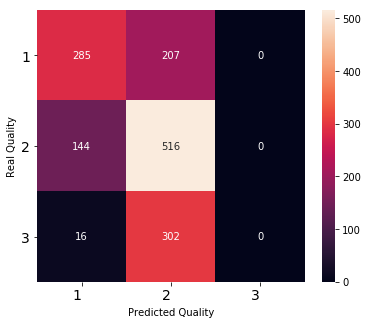

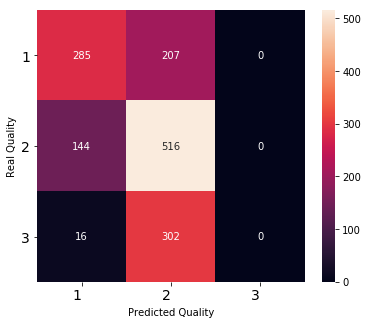

In [134]:
print_confusion_matrix(confusion_matrix(y3_test,y_pred),["1", "2", "3"])

# Gaussian

In [136]:
svclassifier = SVC(kernel='rbf')  
svclassifier.fit(X_train, y_train)  

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [137]:
y_pred = svclassifier.predict(X_test)  

In [138]:
print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred))  

[[  0   0   1   5   0   0   0]
 [  0   2  14  32   1   0   0]
 [  0   0 214 209  14   0   0]
 [  0   0 102 517  41   0   0]
 [  0   0  17 170  77   0   0]
 [  0   0   1  38   8   6   0]
 [  0   0   0   1   0   0   0]]
             precision    recall  f1-score   support

          3       0.00      0.00      0.00         6
          4       1.00      0.04      0.08        49
          5       0.61      0.49      0.54       437
          6       0.53      0.78      0.63       660
          7       0.55      0.29      0.38       264
          8       1.00      0.11      0.20        53
          9       0.00      0.00      0.00         1

avg / total       0.59      0.56      0.52      1470



C:\Users\renz\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## quality3

In [139]:
svclassifier = SVC(kernel='rbf')  
svclassifier.fit(X_train, y3_train)  

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [140]:
y_pred = svclassifier.predict(X_test)  

In [141]:
print(confusion_matrix(y3_test,y_pred))  

[[262 216  14]
 [127 480  53]
 [ 26 169 123]]


In [142]:
print(classification_report(y3_test,y_pred))

             precision    recall  f1-score   support

          1       0.63      0.53      0.58       492
          2       0.55      0.73      0.63       660
          3       0.65      0.39      0.48       318

avg / total       0.60      0.59      0.58      1470



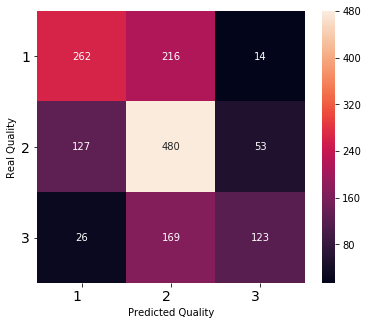

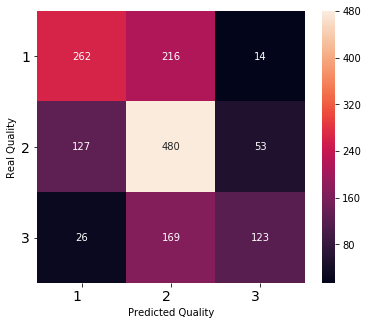

In [143]:
print_confusion_matrix(confusion_matrix(y3_test,y_pred),["1", "2", "3"])

# Poly

# quality3

In [ ]:
svclassifier = SVC(kernel='poly', degree=2)  
svclassifier.fit(X_train, y3_train)  

In [ ]:
y_pred = svclassifier.predict(X_test)  

In [ ]:
print(confusion_matrix(y3_test,y_pred))  
print(classification_report(y3_test,y_pred))  

# Choose some variables 

In [178]:
variables = ["alcohol", "density", "volatile acidity", "free sulfur dioxide", "total sulfur dioxide", "residual sugar", "chlorides"]
X_train_new = X_train[["alcohol", "density", "volatile acidity", "free sulfur dioxide", "total sulfur dioxide", "residual sugar", "chlorides"]]
X_test_new = X_test[["alcohol", "density", "volatile acidity", "free sulfur dioxide", "total sulfur dioxide", "residual sugar", "chlorides"]]

### quality3

In [282]:
svclassifier = SVC(kernel='linear')  
svclassifier.fit(X_train_new, y3_train)  

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [283]:
y_pred = svclassifier.predict(X_test_new)  

In [284]:
print(confusion_matrix(y3_test,y_pred))  
print(classification_report(y3_test,y_pred))  

[[272 220   0]
 [128 532   0]
 [  7 311   0]]
             precision    recall  f1-score   support

          1       0.67      0.55      0.61       492
          2       0.50      0.81      0.62       660
          3       0.00      0.00      0.00       318

avg / total       0.45      0.55      0.48      1470



C:\Users\renz\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Gaussian

In [361]:
svclassifier = SVC(kernel='rbf')  
svclassifier.fit(X_train_new, y_train)  

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [362]:
y_pred = svclassifier.predict(X_test_new)  

In [363]:
print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred))  

[[  0   0   1   5   0   0   0]
 [  0   2  17  29   1   0   0]
 [  0   0 208 220   9   0   0]
 [  0   0  96 532  32   0   0]
 [  0   0  17 162  85   0   0]
 [  0   0   4  37   6   6   0]
 [  0   0   0   1   0   0   0]]
             precision    recall  f1-score   support

          3       0.00      0.00      0.00         6
          4       1.00      0.04      0.08        49
          5       0.61      0.48      0.53       437
          6       0.54      0.81      0.65       660
          7       0.64      0.32      0.43       264
          8       1.00      0.11      0.20        53
          9       0.00      0.00      0.00         1

avg / total       0.61      0.57      0.54      1470



C:\Users\renz\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## quality3

In [317]:
svclassifier = SVC(kernel='rbf')  
svclassifier.fit(X_train_new, y3_train)  

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [318]:
y_pred = svclassifier.predict(X_test_new)  

In [394]:
print(confusion_matrix(y3_test,y_pred))  

[[300 185   7]
 [169 416  75]
 [ 26 176 116]]


In [396]:
print(classification_report(y3_test,y_pred))

             precision    recall  f1-score   support

          1       0.61      0.61      0.61       492
          2       0.54      0.63      0.58       660
          3       0.59      0.36      0.45       318

avg / total       0.57      0.57      0.56      1470



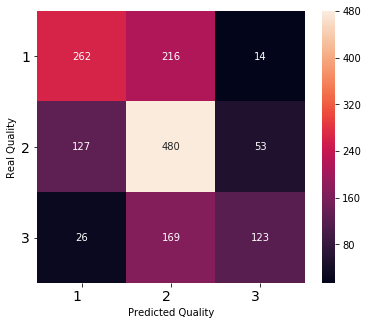

In [472]:
cm1 = print_confusion_matrix(confusion_matrix(y3_test,y_pred),["1", "2", "3"])

In [475]:
# cm1.savefig("cm1")

In [15]:
scaler = MinMaxScaler()
scaler.fit(pd.concat([X_train, X_test], axis = 'rows'))

MinMaxScaler(copy=True, feature_range=(0, 1))

In [21]:
scaled_X_train = X_train.copy()
scaled_X_test = X_test.copy()

In [28]:
X_train.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0           10.7              0.22         0.56             8.2      0.044   
1            6.8              0.15         0.41            12.9      0.044   
2            7.0              0.16         0.25            14.3      0.044   
3            6.7              0.24         0.29            14.9      0.053   
4            7.4              0.28         0.25            11.9      0.053   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 37.0                 181.0  0.99800  2.87       0.68   
1                 79.5                 183.0  0.99742  3.24       0.78   
2                 27.0                 149.0  0.99800  2.91       0.46   
3                 55.0                 136.0  0.99839  3.03       0.52   
4                 25.0                 148.0  0.99760  3.10       0.62   

   alcohol  
0      9.5  
1     10.2  
2      9.2  
3      9.0  
4      9.2

In [30]:
scaled_X_train.values

array([[10.7 ,  0.22,  0.56, ...,  2.87,  0.68,  9.5 ],
       [ 6.8 ,  0.15,  0.41, ...,  3.24,  0.78, 10.2 ],
       [ 7.  ,  0.16,  0.25, ...,  2.91,  0.46,  9.2 ],
       ...,
       [ 6.6 ,  0.16,  0.21, ...,  3.15,  0.52, 10.8 ],
       [ 6.2 ,  0.36,  0.32, ...,  3.2 ,  0.5 , 13.3 ],
       [ 7.5 ,  0.29,  0.67, ...,  2.9 ,  0.41,  8.9 ]])

In [31]:
scaled_X_train_val = scaler.transform(X_train)

In [35]:
scaled_X_test_val = scaler.transform(X_test)

In [32]:
scaled_X_train = pd.DataFrame({"fixed acidity" : scaled_X_train_val[:,0],
                               "volatile acidity" : scaled_X_train_val[:,1],
                               "citric acid" : scaled_X_train_val[:,2],
                               "residual sugar" : scaled_X_train_val[:,3],
                               "chlorides" : scaled_X_train_val[:,4],
                               "free sulfur dioxide" : scaled_X_train_val[:,5],
                               "total sulfur dioxide" : scaled_X_train_val[:,6],
                               "density" : scaled_X_train_val[:,7],
                               "pH" : scaled_X_train_val[:,8],
                               "sulphates" : scaled_X_train_val[:,9],
                               "alcohol" : scaled_X_train_val[:,10]})

In [33]:
scaled_X_train.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0       0.663462          0.137255     0.337349        0.116564   0.103858   
1       0.288462          0.068627     0.246988        0.188650   0.103858   
2       0.307692          0.078431     0.150602        0.210123   0.103858   
3       0.278846          0.156863     0.174699        0.219325   0.130564   
4       0.346154          0.196078     0.150602        0.173313   0.130564   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0             0.121951              0.399072  0.209948  0.136364   0.534884   
1             0.270035              0.403712  0.198766  0.472727   0.651163   
2             0.087108              0.324826  0.209948  0.172727   0.279070   
3             0.184669              0.294664  0.217467  0.281818   0.348837   
4             0.080139              0.322506  0.202236  0.345455   0.465116   

    alcohol  
0  0.241935  
1  0.354839  
2  0.193548  
3  0.161290  
4  0.193548

In [36]:
scaled_X_test = pd.DataFrame({"fixed acidity" : scaled_X_test_val[:,0],
                               "volatile acidity" : scaled_X_test_val[:,1],
                               "citric acid" : scaled_X_test_val[:,2],
                               "residual sugar" : scaled_X_test_val[:,3],
                               "chlorides" : scaled_X_test_val[:,4],
                               "free sulfur dioxide" : scaled_X_test_val[:,5],
                               "total sulfur dioxide" : scaled_X_test_val[:,6],
                               "density" : scaled_X_test_val[:,7],
                               "pH" : scaled_X_test_val[:,8],
                               "sulphates" : scaled_X_test_val[:,9],
                               "alcohol" : scaled_X_test_val[:,10]})

In [37]:
scaled_X_test.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0       0.173077          0.107843     0.156627        0.012270   0.062315   
1       0.288462          0.215686     0.210843        0.033742   0.086053   
2       0.298077          0.313725     0.180723        0.153374   0.071217   
3       0.355769          0.333333     0.084337        0.154908   0.109792   
4       0.298077          0.294118     0.174699        0.200153   0.115727   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0             0.034843              0.155452  0.065356  0.481818   0.174419   
1             0.027875              0.359629  0.078851  0.336364   0.360465   
2             0.076655              0.180974  0.106805  0.390909   0.267442   
3             0.055749              0.199536  0.169462  0.454545   0.127907   
4             0.174216              0.417633  0.206863  0.254545   0.441860   

    alcohol  
0  0.467742  
1  0.645161  
2  0.774194  
3  0.435484  
4  0.241935

In [179]:
svclassifier = SVC(kernel='linear')  
svclassifier.fit(scaled_X_train, y3_train)  

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [180]:
y_pred = svclassifier.predict(scaled_X_test)  

In [181]:
print(confusion_matrix(y3_test,y_pred))  
print(classification_report(y3_test,y_pred))  

[[266 226   0]
 [117 543   0]
 [  6 312   0]]
             precision    recall  f1-score   support

          1       0.68      0.54      0.60       492
          2       0.50      0.82      0.62       660
          3       0.00      0.00      0.00       318

avg / total       0.45      0.55      0.48      1470



C:\Users\renz\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Gaussian

In [186]:
svclassifier = SVC(kernel='rbf', C=10, gamma = 10)  
svclassifier.fit(scaled_X_train, y3_train)  

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=10, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [187]:
y_pred = svclassifier.predict(scaled_X_test)  

In [188]:
print(confusion_matrix(y3_test,y_pred))  
print(classification_report(y3_test,y_pred))  

[[356 125  11]
 [164 420  76]
 [ 17 128 173]]
             precision    recall  f1-score   support

          1       0.66      0.72      0.69       492
          2       0.62      0.64      0.63       660
          3       0.67      0.54      0.60       318

avg / total       0.65      0.65      0.64      1470



In [1]:
cm1 = print_confusion_matrix(confusion_matrix(y3_test,y_pred),["1", "2", "3"])

NameError: name 'print_confusion_matrix' is not defined

In [190]:
# cm1.savefig("cm1.png")

# Decision Tree

In [364]:
dt = DecisionTreeClassifier(max_depth=5)

In [365]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [366]:
import graphviz
import pydotplus # install GraphViz first, and then install pydotplus
from IPython.display import Image  
from sklearn.tree import export_graphviz

dot_data = export_graphviz(dt, out_file=None, feature_names=X_train.columns,
                          class_names=str(pd.unique(y_train)), filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)

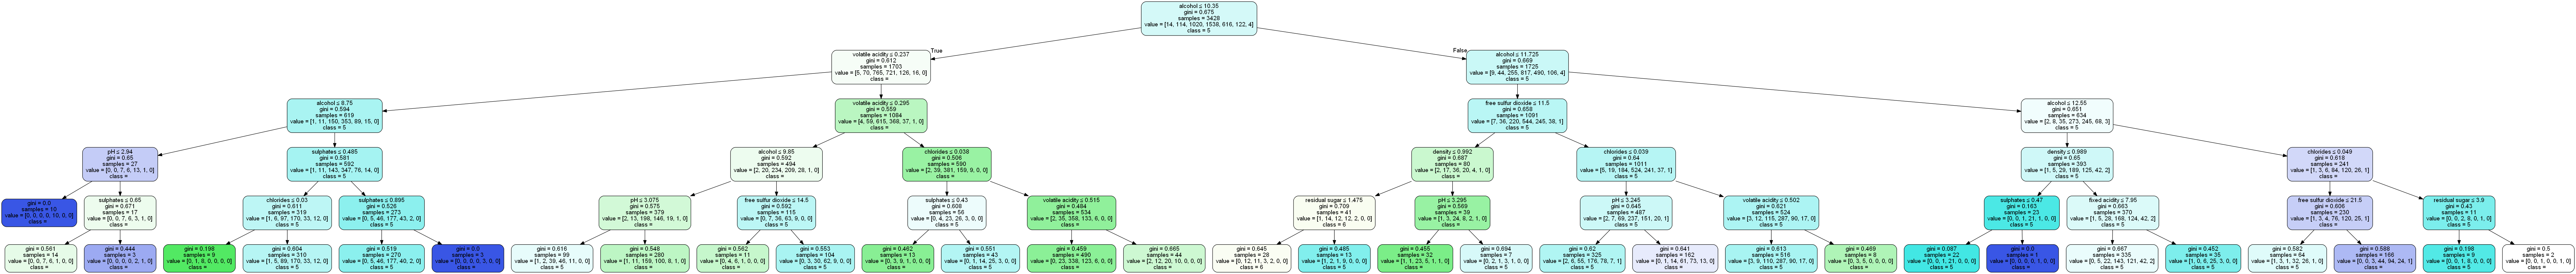

In [146]:
Image(graph.create_png())

In [147]:
# graph.write_png('tree.png')

In [148]:
y_pred = dt.predict(X_test)

In [149]:
print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred))  

[[  0   0   3   3   0   0   0]
 [  0   1  30  18   0   0   0]
 [  0   4 247 174  12   0   0]
 [  0   1 128 475  56   0   0]
 [  0   0   6 181  77   0   0]
 [  0   0   0  35  18   0   0]
 [  0   0   0   0   1   0   0]]
             precision    recall  f1-score   support

          3       0.00      0.00      0.00         6
          4       0.17      0.02      0.04        49
          5       0.60      0.57      0.58       437
          6       0.54      0.72      0.61       660
          7       0.47      0.29      0.36       264
          8       0.00      0.00      0.00        53
          9       0.00      0.00      0.00         1

avg / total       0.51      0.54      0.51      1470



C:\Users\renz\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [156]:
important = dt.feature_importances_
indice = np.argsort(important)
for i in zip(X_train.columns[indice][::-1], important[indice][::-1]):
    print(i)

('alcohol', 0.4474097115164899)
('volatile acidity', 0.2516363532297983)
('free sulfur dioxide', 0.06843545751883899)
('chlorides', 0.06526795793390887)
('pH', 0.05821035036683789)
('sulphates', 0.04669496173506537)
('density', 0.028184403512529134)
('residual sugar', 0.018079464429326616)
('fixed acidity', 0.016081339757204945)
('total sulfur dioxide', 0.0)
('citric acid', 0.0)


# quality3

In [485]:
dt = DecisionTreeClassifier(max_depth=5)

In [486]:
dt.fit(X_train, y3_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [507]:
y3cols = list(y3_train.unique())
for i in range(len(y3cols)):
    y3cols[i] = str(y3cols[i])
y3cols

['2', '1', '3']

In [535]:
import graphviz
import pydotplus # install GraphViz first, and then install pydotplus
from IPython.display import Image  
from sklearn.tree import export_graphviz

dot_data = export_graphviz(dt, out_file=None, feature_names=X_train.columns,
                          class_names=(y3cols), filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)

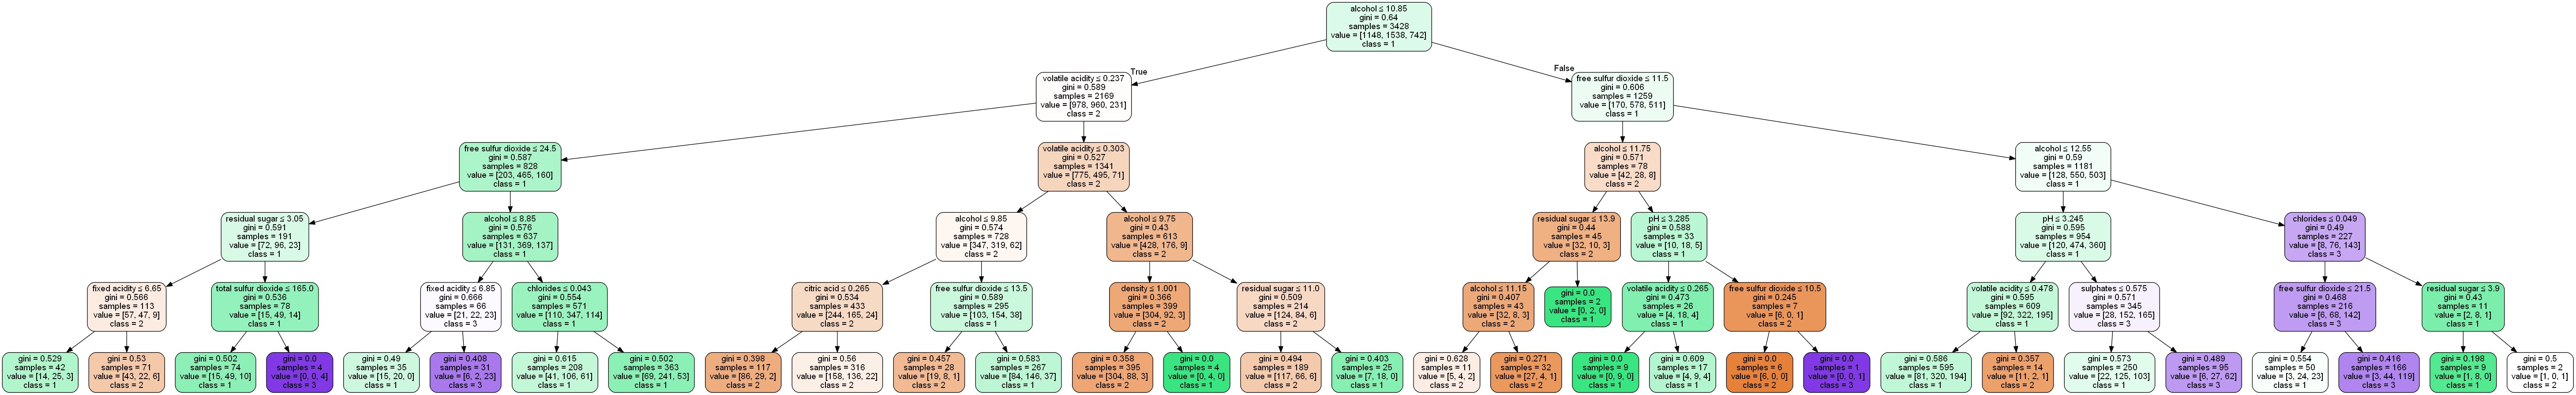

In [536]:
Image(graph.create_png())

In [510]:
# graph.write_png('tree3.png')

True

In [511]:
important = dt.feature_importances_
indice = np.argsort(important)
for i in zip(X_train.columns[indice][::-1], important[indice][::-1]):
    print(i)

('alcohol', 0.4524238429088811)
('volatile acidity', 0.270893549072608)
('free sulfur dioxide', 0.08867880457002417)
('fixed acidity', 0.040598875641521794)
('residual sugar', 0.03754078715532656)
('pH', 0.030323055558839927)
('chlorides', 0.02532501361308763)
('citric acid', 0.01730551570764325)
('sulphates', 0.016056074292582403)
('density', 0.010515373792178177)
('total sulfur dioxide', 0.010339107687306946)


In [491]:
y_pred = dt.predict(X_test)

In [492]:
print(confusion_matrix(y3_test,y_pred))  
print(classification_report(y3_test,y_pred))  

[[330 156   6]
 [169 457  34]
 [ 18 206  94]]
             precision    recall  f1-score   support

          1       0.64      0.67      0.65       492
          2       0.56      0.69      0.62       660
          3       0.70      0.30      0.42       318

avg / total       0.62      0.60      0.59      1470



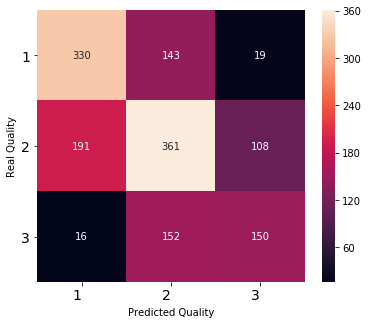

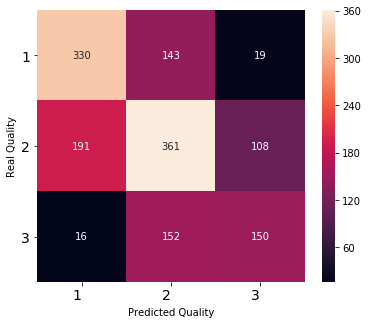

In [484]:
print_confusion_matrix(confusion_matrix(y3_test,y_pred),["1", "2", "3"])

# RandomForest

In [375]:
rf = RandomForestClassifier(n_estimators = 1000, random_state = 1)

In [38]:
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

In [39]:
y_pred = rf.predict(X_test)

In [40]:
print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred))  

[[  0   0   3   3   0   0   0]
 [  0   5  31  13   0   0   0]
 [  0   3 321 111   2   0   0]
 [  0   0  88 535  37   0   0]
 [  0   0   4 117 142   1   0]
 [  0   0   0  20  17  16   0]
 [  0   0   0   1   0   0   0]]
             precision    recall  f1-score   support

          3       0.00      0.00      0.00         6
          4       0.62      0.10      0.18        49
          5       0.72      0.73      0.73       437
          6       0.67      0.81      0.73       660
          7       0.72      0.54      0.61       264
          8       0.94      0.30      0.46        53
          9       0.00      0.00      0.00         1

avg / total       0.70      0.69      0.68      1470



C:\Users\renz\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## quality3

In [512]:
rf.fit(X_train, y3_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

In [513]:
y_pred = rf.predict(X_test)

In [514]:
print(confusion_matrix(y3_test,y_pred))  

[[372 114   6]
 [106 499  55]
 [  7 121 190]]


In [515]:
print(classification_report(y3_test,y_pred))  

             precision    recall  f1-score   support

          1       0.77      0.76      0.76       492
          2       0.68      0.76      0.72       660
          3       0.76      0.60      0.67       318

avg / total       0.73      0.72      0.72      1470



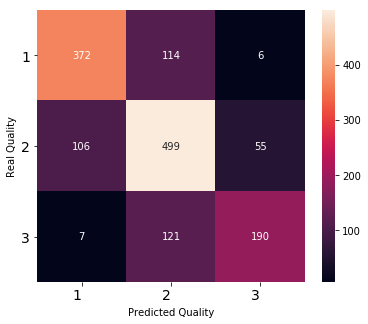

In [517]:
cm2 = print_confusion_matrix(confusion_matrix(y3_test,y_pred),["1", "2", "3"])

In [519]:
# cm2.savefig("cm2")

In [380]:
importances = rf.feature_importances_
indices = np.argsort(importances) # sort

In [381]:
importances

array([0.07012042, 0.10463764, 0.07845647, 0.08849207, 0.08631524,
       0.09576556, 0.0906139 , 0.10576244, 0.08391438, 0.0780256 ,
       0.11789627])

In [382]:
indices

array([ 0,  9,  2,  8,  4,  3,  6,  5,  1,  7, 10], dtype=int64)

In [527]:
importances[indices]

array([0.07012042, 0.0780256 , 0.07845647, 0.08391438, 0.08631524,
       0.08849207, 0.0906139 , 0.09576556, 0.10463764, 0.10576244,
       0.11789627])

[Text(0,0.5,'Feature')]

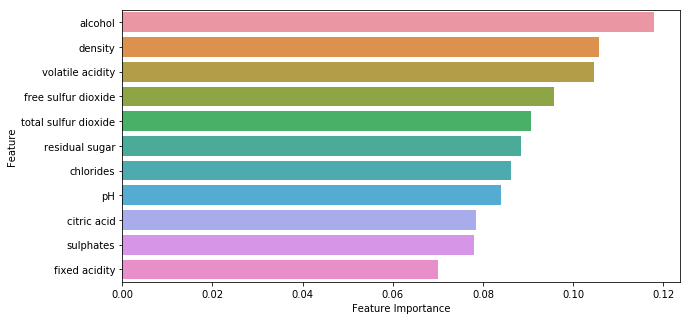

In [530]:
fig = plt.figure(figsize=(10, 5))
features = sns.barplot(x = importances[indices][::-1], y = X_train.columns[indices][::-1])
features.set(xlabel='Feature Importance')
features.set(ylabel='Feature')

In [524]:
fig = features.get_figure()
# fig.savefig("importance")

# Neural Network

In [385]:
nn = MLPClassifier(solver='lbfgs', hidden_layer_sizes=(100, 100, 100, 100, 100, 100, 100), max_iter = 500, random_state=1, alpha = 0.001)

In [386]:
nn.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100, 100, 100, 100, 100, 100, 100),
       learning_rate='constant', learning_rate_init=0.001, max_iter=500,
       momentum=0.9, nesterovs_momentum=True, power_t=0.5, random_state=1,
       shuffle=True, solver='lbfgs', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [387]:
y_pred = nn.predict(X_test)

In [388]:
print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred))  

[[  0   2   3   1   0   0   0]
 [  0   0  39  10   0   0   0]
 [  0   2 248 183   4   0   0]
 [  0   3 149 463  45   0   0]
 [  0   0  15 194  54   1   0]
 [  0   0   5  29  19   0   0]
 [  0   0   0   0   1   0   0]]
             precision    recall  f1-score   support

          3       0.00      0.00      0.00         6
          4       0.00      0.00      0.00        49
          5       0.54      0.57      0.55       437
          6       0.53      0.70      0.60       660
          7       0.44      0.20      0.28       264
          8       0.00      0.00      0.00        53
          9       0.00      0.00      0.00         1

avg / total       0.48      0.52      0.48      1470



C:\Users\renz\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# quality3

In [389]:
nn = MLPClassifier(solver='lbfgs', hidden_layer_sizes=(100, 100, 100, 100, 100), max_iter = 500, random_state=1)

In [390]:
nn.fit(X_train, y3_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100, 100, 100, 100, 100),
       learning_rate='constant', learning_rate_init=0.001, max_iter=500,
       momentum=0.9, nesterovs_momentum=True, power_t=0.5, random_state=1,
       shuffle=True, solver='lbfgs', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [391]:
y_pred = nn.predict(X_test)

In [392]:
print(confusion_matrix(y3_test,y_pred))  
print(classification_report(y3_test,y_pred))  

[[300 185   7]
 [169 416  75]
 [ 26 176 116]]
             precision    recall  f1-score   support

          1       0.61      0.61      0.61       492
          2       0.54      0.63      0.58       660
          3       0.59      0.36      0.45       318

avg / total       0.57      0.57      0.56      1470



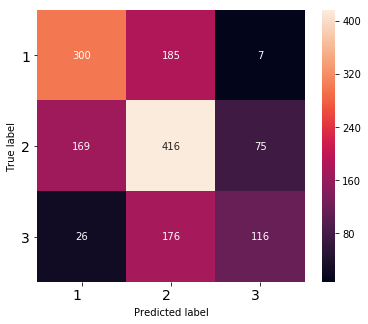

In [393]:
print_confusion_matrix(confusion_matrix(y3_test,y_pred),["1", "2", "3"])

# 혹시 몰라 텐서플로우 써봄

In [189]:
train = train.drop("quality3", axis = 1)

In [192]:
column_list = train.columns[:-1]

In [194]:
column_list

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [195]:
def normalize_data(df, columns):
    for column in columns:
        mean_value = df.loc[:,column].mean()
        stdev = np.std(df.loc[:,column].values)
        df.loc[:,column] = (df.loc[:,column] - mean_value) / stdev
    return df

In [197]:
white_wine_norm = normalize_data(train, column_list)
white_wine_norm.describe().T

count          mean       std       min       25%  \
fixed acidity         3428.0 -5.311452e-18  1.000146 -3.719023 -0.676086   
volatile acidity      3428.0 -1.289808e-17  1.000146 -2.023440 -0.681951   
citric acid           3428.0  7.772857e-19  1.000146 -2.872728 -0.553855   
residual sugar        3428.0  3.360141e-17  1.000146 -1.160295 -0.939234   
chlorides             3428.0 -7.149409e-17  1.000146 -2.472388 -0.568907   
free sulfur dioxide   3428.0 -1.301953e-17  1.000146 -2.051247 -0.692608   
total sulfur dioxide  3428.0  1.188599e-17  1.000146 -3.064686 -0.717848   
density               3428.0  5.764869e-18  1.000146 -2.378000 -0.802614   
pH                    3428.0 -3.368238e-18  1.000146 -3.100358 -0.721141   
sulphates             3428.0  2.882434e-18  1.000146 -2.385463 -0.712715   
alcohol               3428.0 -4.255639e-17  1.000146 -1.723347 -0.822642   
quality               3428.0  5.878063e+00  0.886140  3.000000  5.000000   

                           50%       75%       max  
fixed acidity        -0.067499  0.541089  4.679484  
volatile acidity     -0.165993  0.453156  5.199963  
citric acid          -0.124434  0.476755  4.942733  
residual sugar       -0.235859  0.708674  5.069600  
chlorides            -0.075412  0.418083  7.468013  
free sulfur dioxide  -0.075044  0.666032  5.143368  
total sulfur dioxide -0.101507  0.704477  4.876633  
density              -0.078695  0.748642  3.075525  
pH                   -0.060248  0.600646  4.103381  
sulphates            -0.096440  0.519835  5.009842  
alcohol              -0.085702  0.651237  2.902998  
quality               6.000000  6.000000  9.000000

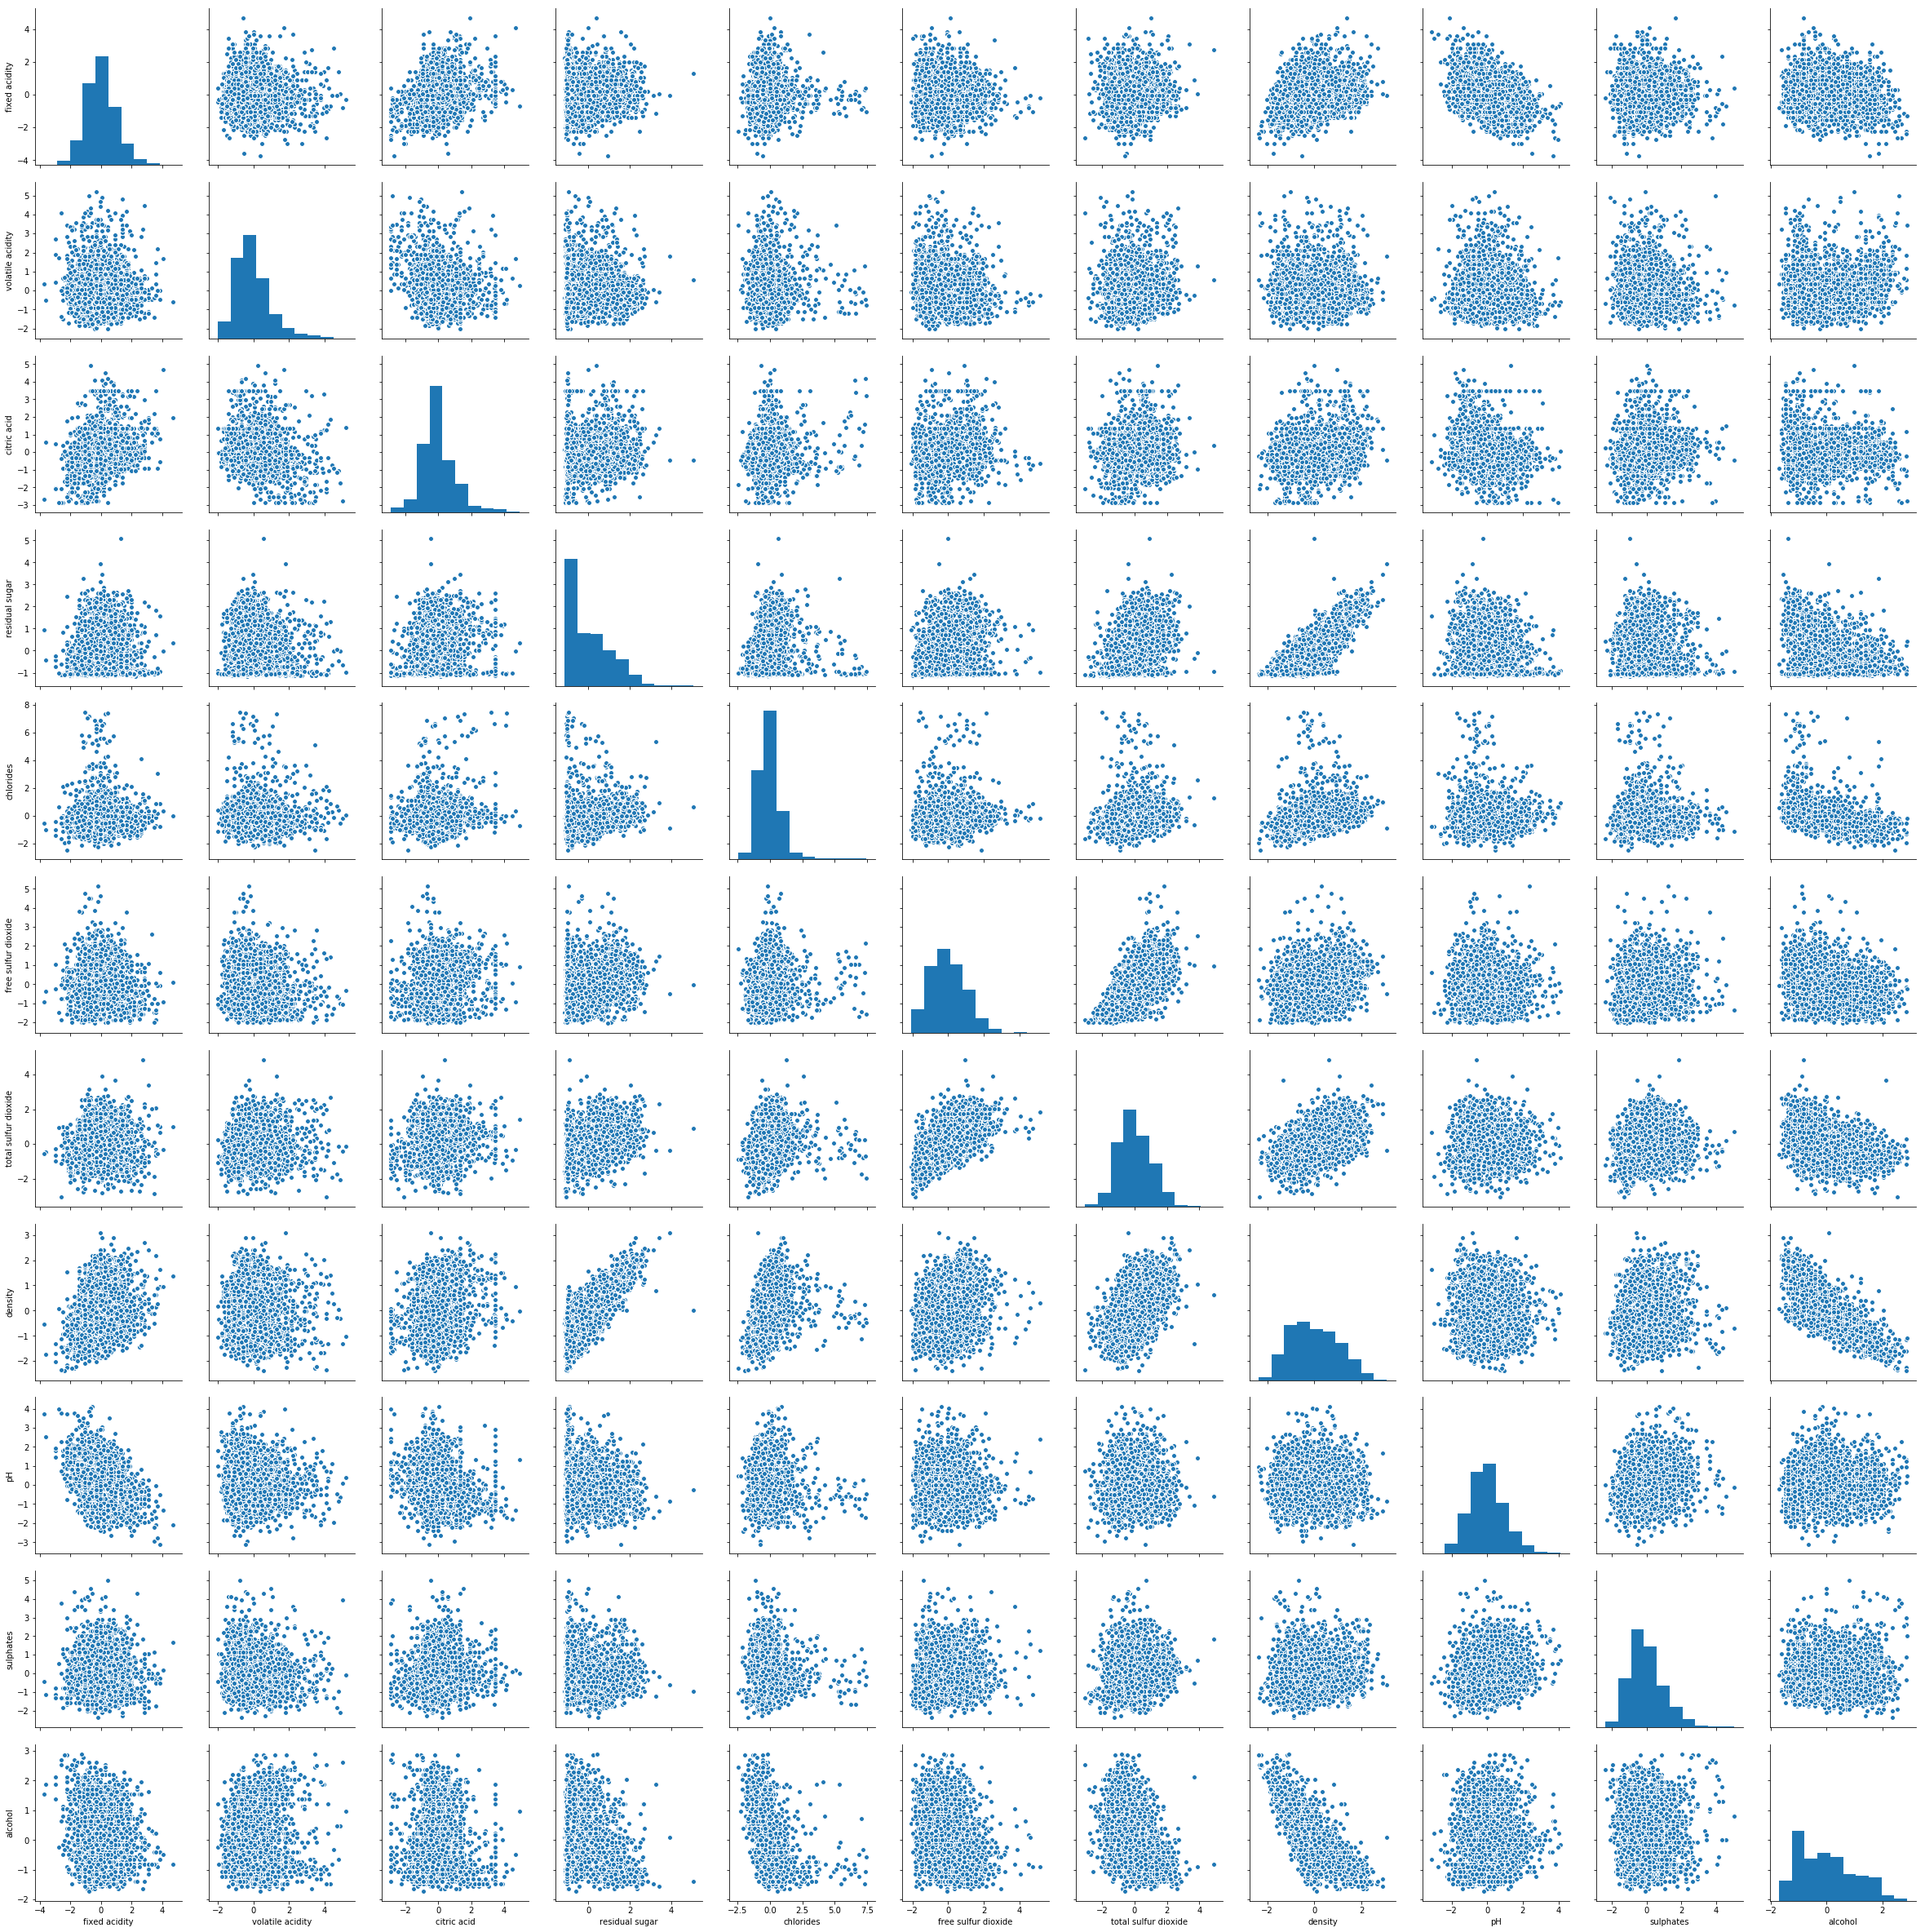

In [198]:
sns.pairplot(white_wine_norm.loc[:,column_list], size=3)

In [199]:
def outliers(df, threshold, columns):
    for col in columns: 
        mask = df[col] > float(threshold)*df[col].std()+df[col].mean()
        df.loc[mask == True,col] = np.nan
        mean_property = df.loc[:,col].mean()
        df.loc[mask == True,col] = mean_property
    return df

threshold = 5

white_wine_no_outliers = outliers(white_wine_norm, threshold, column_list[0:-1])

In [279]:
sns.pairplot(white_wine_no_outliers.loc[:,column_list+['quality']], size=3, hue='quality')

KeyError: "None of [Index(['fixed acidityquality', 'volatile acidityquality', 'citric acidquality',\n       'residual sugarquality', 'chloridesquality',\n       'free sulfur dioxidequality', 'total sulfur dioxidequality',\n       'densityquality', 'pHquality', 'sulphatesquality', 'alcoholquality'],\n      dtype='object')] are in the [columns]"

In [201]:
print("The range in wine quality is {0}".format(np.sort(white_wine_no_outliers['quality'].unique())))

The range in wine quality is [3 4 5 6 7 8 9]


In [202]:
white_wine_cut = white_wine_no_outliers.copy()
bins = [3, 5, 6, 9]
white_wine_cut['category'] = pd.cut(white_wine_cut.quality, bins, labels=['Bad', 'SoSo' ,'Good'], include_lowest=True)

In [263]:
white_wine_cut.head(20)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0        4.679484         -0.578759     1.936786        0.367034  -0.004912   
1       -0.067499         -1.301099     0.648524        1.311567  -0.004912   
2        0.175936         -1.197908    -0.725624        1.592917  -0.004912   
3       -0.189216         -0.372376    -0.382087        1.713495   0.629581   
4        0.662806          0.040390    -0.725624        1.110602   0.629581   
5        2.488569         -1.507482     1.335597       -1.079909  -1.132901   
6        2.853721         -1.301099     2.967397       -0.959331   0.136086   
7       -0.310934         -0.475568    -1.155045        1.010120  -0.004912   
8        0.054219          2.516985     1.765018        0.306745  -0.568907   
9       -0.554368         -0.475568    -0.639739        0.346938   0.700081   
10       0.541089         -0.165993    -0.038550        2.306340   0.347584   
11       1.027959          0.143581    -0.382087       -0.316245   1.123076   
12       1.149676         -0.681951     1.335597       -1.009572   0.559082   
13       1.514829         -0.578759    -0.467971        0.266552  -0.075412   
14      -0.554368         -1.094716     0.047334        1.412049  -0.004912   
15       0.541089          0.246773     0.734408        0.196214  -1.344399   
16       1.149676         -0.372376    -1.326813        0.065588   0.136086   
17      -0.554368          0.556347    -0.296203        0.166070  -0.216410   
18       0.297654         -0.165993     0.047334        1.613013   1.616571   
19       0.541089          0.040390     0.133218       -0.959331   0.700081   

    free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0              0.110225              1.012648  1.369144 -2.109017   1.664347   
1              2.734870              1.060059  1.169204  0.336288   2.544740   
2             -0.507338              0.254074  1.369144 -1.844660  -0.272519   
3              1.221840             -0.054096  1.503586 -1.051588   0.255717   
4             -0.630851              0.230369  1.231254 -0.588962   1.136111   
5             -1.804222             -2.709105 -0.492363 -1.844660  -1.505069   
6             -0.816120             -0.196329  0.266029 -1.117677  -0.360558   
7              0.604276             -0.172624  0.693486 -1.514213   0.167678   
8             -0.754364              0.728183 -0.468232  0.468467  -0.184479   
9              0.727789              1.012648  0.472863 -0.456784  -0.008401   
10             0.388129              1.344524  2.058591 -0.853320  -0.448597   
11            -0.507338              0.420012  0.583174  1.988522   0.871993   
12            -1.804222             -2.140174 -1.009448 -0.258516  -1.857227   
13             1.345352              0.894121  0.472863 -0.456784   0.519835   
14             0.604276              0.017020  1.203677 -0.853320  -0.536637   
15             0.974814              0.870415 -0.423418 -0.985499  -1.505069   
16            -0.136800              0.514834  0.783114  0.071931   0.607875   
17             0.419007              0.704477 -0.247609  0.204110  -0.008401   
18            -0.013288              1.202291  1.575978 -0.787231   0.343757   
19            -0.260313              0.230369 -0.775036 -0.060248  -0.184479   

     alcohol  quality category  
0  -0.822642        6     SoSo  
1  -0.249467        6     SoSo  
2  -1.068289        6     SoSo  
3  -1.232053        5      Bad  
4  -1.068289        5      Bad  
5  -0.495113        5      Bad  
6  -0.085702        6     SoSo  
7  -0.658878        6     SoSo  
8   1.388177        6     SoSo  
9  -0.904525        5      Bad  
10 -1.150171        7     Good  
11 -0.167585        6     SoSo  
12  0.733120        5      Bad  
13 -0.413231        5      Bad  
14 -1.150171        6     SoSo  
15  0.733120        6     SoSo  
16 -0.576996        6     SoSo  
17  0.487473        6     SoSo  
18 -1.150171        7     Good  
19 

In [278]:
sns.pairplot(white_wine_cut.loc[:,column_list+['category']], size=3, hue='category')

KeyError: "None of [Index(['fixed aciditycategory', 'volatile aciditycategory',\n       'citric acidcategory', 'residual sugarcategory', 'chloridescategory',\n       'free sulfur dioxidecategory', 'total sulfur dioxidecategory',\n       'densitycategory', 'pHcategory', 'sulphatescategory',\n       'alcoholcategory'],\n      dtype='object')] are in the [columns]"

In [207]:
df = white_wine_cut.copy()

In [208]:
features_list = df.columns.values[:-2]
labels_column = df.columns.values[-1]
print('The features are: {}'.format(features_list))
print('The label column is: {}'.format(labels_column))

The features are: ['fixed acidity' 'volatile acidity' 'citric acid' 'residual sugar'
 'chlorides' 'free sulfur dioxide' 'total sulfur dioxide' 'density' 'pH'
 'sulphates' 'alcohol']
The label column is: category


In [222]:
y = []
for item in df['category']:
    if item == 'Bad':
        y.append(0)
    elif item == 'SoSo':
        y.append(1)
    else:
        y.append(2)
        
print(y[0:20])

[1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 2, 1, 0, 0, 1, 1, 1, 1, 2, 0]


In [223]:
X = df.drop(['quality', 'category'], axis=1).values

In [224]:
def dense_to_one_hot(labels_dense, num_classes=3):
    labels_one_hot = []
    for label in labels_dense:
        indices = [0]*num_classes
        indices[label] = 1
        labels_one_hot.append(indices)
    
    return labels_one_hot

In [226]:
y_one_hot = dense_to_one_hot(y, num_classes=3)
print(y_one_hot[0:20])

[[0, 1, 0], [0, 1, 0], [0, 1, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [0, 1, 0], [0, 1, 0], [0, 1, 0], [1, 0, 0], [0, 0, 1], [0, 1, 0], [1, 0, 0], [1, 0, 0], [0, 1, 0], [0, 1, 0], [0, 1, 0], [0, 1, 0], [0, 0, 1], [1, 0, 0]]


In [231]:
X_train, X_test, y_train, y_test = train_test_split(X, y_one_hot, test_size=0.3, random_state=42)

In [266]:
learning_rate = 0.001
batch_size = X_train.shape[0] // 10
num_features = X_train.shape[1]
num_classes = 3
epochs = 1000
epochs_to_print = epochs // 10
hidden_layer_units = 20

In [267]:
X_placeholder = tf.placeholder(tf.float32, [None, num_features], name='X')
y_placeholder = tf.placeholder(tf.float32, [None, num_classes], name='y')

In [268]:
def make_batch(X, y, batch_size):
    
    y_size = len(y)
    index_sample = np.random.choice(y_size, batch_size, replace=False)
    y_array = np.array(y)
    
    X_batch = X[index_sample]
    y_batch = y_array[index_sample]
    
    return X_batch, y_batch

In [269]:
def softmax_layer(X_tensor, num_units):
    num_inputs = X_tensor.get_shape()[1].value
    W = tf.Variable(tf.zeros([num_inputs, num_units]), name='W')
    b = tf.Variable(tf.zeros([num_units]), name='b')
    y = tf.nn.softmax(tf.matmul(X_tensor, W) + b)
    return y

In [270]:
def relu_layer(X_tensor, num_units):
    num_inputs = X_tensor.get_shape()[1].value
    # W = tf.Variable(tf.zeros([num_features, num_units]), name='W')
    W = tf.Variable(tf.random.uniform([num_features, num_units]), name='W')
    b = tf.Variable(tf.zeros([num_units]), name='b')
    y = tf.nn.relu(tf.matmul(X_tensor, W) + b, name='relu')
    return y

In [271]:
def define_cost_function(y, y_tensor, batch_size):
    cost = -tf.reduce_sum(y_tensor * tf.log(y), name='cross_entropy') / batch_size
    return cost

In [272]:
def train(cost, learning_rate):
    training_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)
    return training_step

In [273]:
def compute_accuracy(y, y_tensor):
    correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_tensor, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"), name='accuracy')
    return accuracy

In [274]:
def single_layer():
    # Create softmax layer
    with tf.name_scope("softmax") as scope:
        y_softmax = softmax_layer(X_placeholder, num_classes)

    # Define cost function
    with tf.name_scope("cost_function") as scope:
        global cost
        cost = define_cost_function(y_softmax, y_placeholder, batch_size)
        tf.summary.scalar("cost", cost)

    # Define training step
    with tf.name_scope("training") as scope:
        global training_step
        training_step = train(cost, learning_rate)

    # Calculate model accuracy
    with tf.name_scope("accuracy") as scope:
        global accuracy
        accuracy = compute_accuracy(y_softmax, y_placeholder)
        tf.summary.scalar("accuracy", accuracy)

In [275]:
def two_layers():
    # Create hidden, relu layer
    with tf.name_scope("hidden_layer") as scope:
        y_relu = relu_layer(X_placeholder, hidden_layer_units)
    
    # Create softmax layer
    with tf.name_scope("softmax") as scope:
        y_softmax = softmax_layer(y_relu, num_classes)

    # Define cost function
    with tf.name_scope("cost_function") as scope:
        global cost
        cost = define_cost_function(y_softmax, y_placeholder, batch_size)
        tf.summary.scalar("cost", cost)

    # Define training step
    with tf.name_scope("training") as scope:
        global training_step
        training_step = train(cost, learning_rate)

    # Calculate model accuracy
    with tf.name_scope("accuracy") as scope:
        global accuracy
        accuracy = compute_accuracy(y_softmax, y_placeholder)
        tf.summary.scalar("accuracy", accuracy)

In [276]:
single_layer()

In [277]:
# Merge summaries for TensorBoard
merged_summaries = tf.summary.merge_all()

with tf.Session() as sess:

    log_directory = './logs'
    summary_writer = tf.summary.FileWriter(log_directory, sess.graph)
    
    tf.global_variables_initializer().run()
    
    # average_cost = 0
    cost_sum = 0
    for i in range(epochs):
        
        X_batch, y_batch = make_batch(X_train, y_train, batch_size)
        feed_dict = {X_placeholder: X_batch, y_placeholder: y_batch}
        _, current_cost = sess.run([training_step, cost], feed_dict)
        cost_sum += current_cost
        
        # Print average cost periodically
        if i % epochs_to_print == 99:
            average_cost = cost_sum / epochs_to_print
            print("Epoch: {:4d}, average cost = {:0.3f}".format(i+1, average_cost))
            cost_sum = 0
    
    print('Finished model fitting.')
 
    # Calculate final accuracy
    X_batch, y_batch = make_batch(X_test, y_test, batch_size)
    feed_dict = {X_placeholder: X_test, y_placeholder: y_test}
    print("Final accuracy = {:0.3f}".format(sess.run(accuracy, feed_dict)))

Epoch:  100, average cost = 1.091
Epoch:  200, average cost = 1.077
Epoch:  300, average cost = 1.065
Epoch:  400, average cost = 1.054
Epoch:  500, average cost = 1.045
Epoch:  600, average cost = 1.035
Epoch:  700, average cost = 1.029
Epoch:  800, average cost = 1.021
Epoch:  900, average cost = 1.015
Epoch: 1000, average cost = 1.010
Finished model fitting.
Final accuracy = 0.539
